<a href="https://colab.research.google.com/github/diegojeda/Prediccion-NPT/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [442]:
import pandas as pd
import numpy as np
from numpy import loadtxt
from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display, HTML
import pandas as pd
from scipy import stats
#import pandas_profiling
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import missingno as msno
!pip install pycaret[full]
from pycaret.regression import *
from sklearn.model_selection import train_test_split
import math
from pandas_profiling import ProfileReport
from itertools import product
import plotly.graph_objects as go
plt.style.use('ggplot')

from pycaret.utils import enable_colab 
enable_colab();

In [443]:
url = "https://raw.githubusercontent.com/diegojeda/Prediccion-NPT/main/Base_Limpia.csv"

Base = pd.read_csv(url,index_col=0)
Base.head()

Pozo  Num BHA       MD     TVD  DLS Mean    Azi Mean   Inc Mean  \
0    CASTILLA 1        5   7272.5  7268.9  1.097313  228.076490   2.144702   
1    CASTILLA 1        5   7272.5  7268.9  1.097313  228.076490   2.144702   
2  CASTILLA 108        8   9271.0  6577.4  1.316032  168.514516  32.282043   
3  CASTILLA 125        8   7300.0  7293.3  0.664173  175.266000   2.090000   
4  CASTILLA 129       29  10443.1  6832.9  1.259168  240.399664  37.204454   

   Inc Max  Azi Max  DLS Max         MW  Tiempo   Tipo Pozo  Duracion  
0     3.50   356.33     3.79  10.229508    43.0      TIPO J     864.0  
1     3.50   356.33     3.79  10.229508    43.0    VERTICAL     864.0  
2    94.14   289.39     3.68   9.976836     4.0  HORIZONTAL     600.0  
3     4.13   359.03     2.43  10.452941    12.0      TIPO J     384.0  
4    88.16   338.70     4.34  10.313333    19.5      TIPO J     576.0

In [444]:
# Configuracion de Plotly
from plotly.offline import init_notebook_mode, iplot
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))
  
init_notebook_mode(connected=False)
configure_plotly_browser_state()

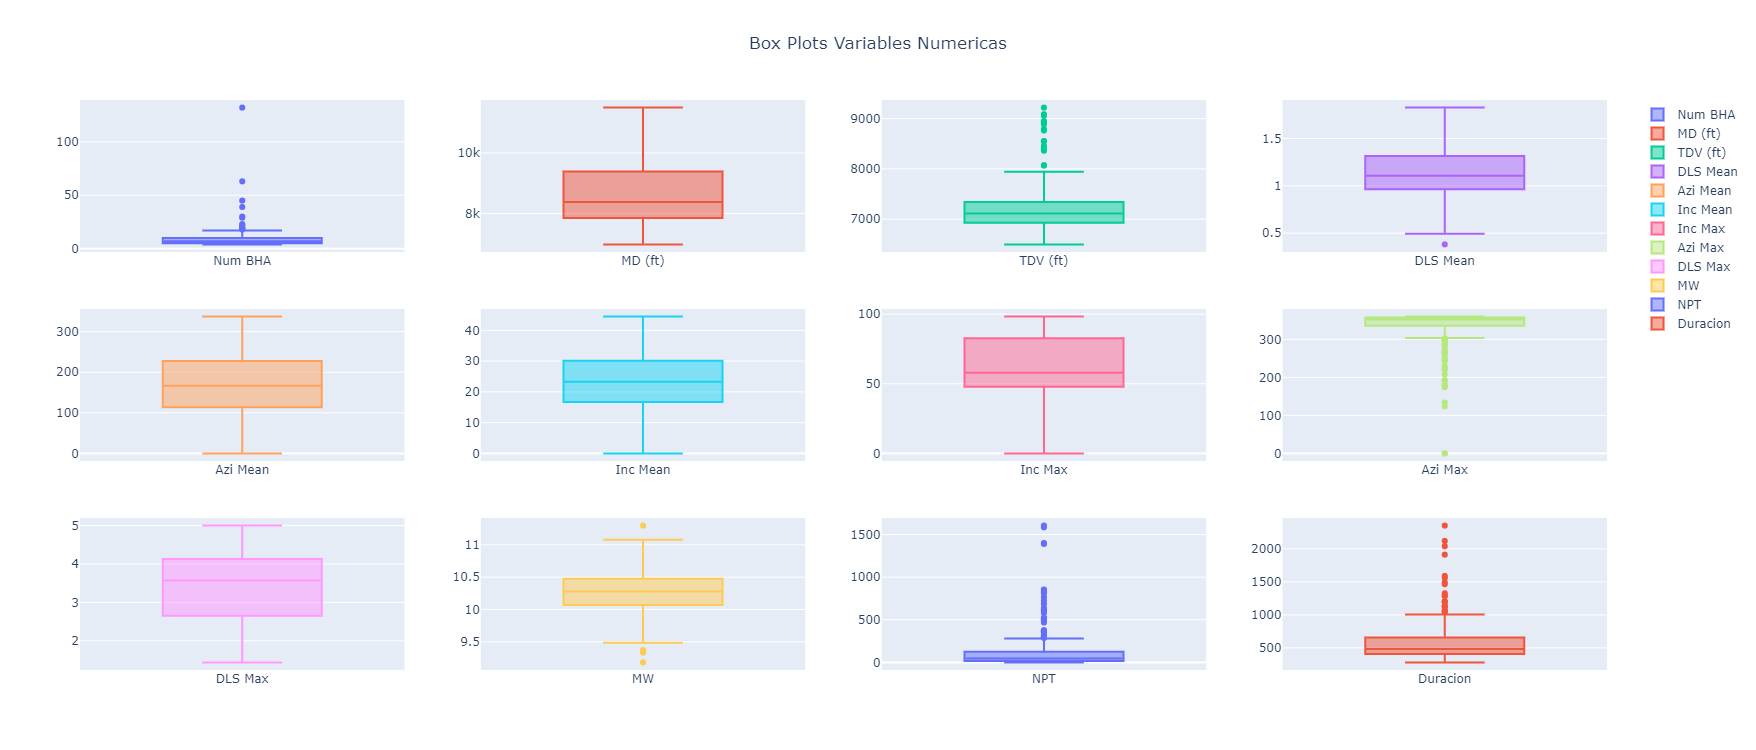

In [445]:
# Definimos los boxplots
trace1 = go.Box(y=Base["Num BHA"],name='Num BHA')
trace2 = go.Box(y=Base.MD,name='MD (ft)')
trace3 = go.Box(y=Base.TVD,name='TDV (ft)')
trace4 = go.Box(y=Base["DLS Mean"],name='DLS Mean')
trace5 = go.Box(y=Base["Azi Mean"],name='Azi Mean')
trace6 = go.Box(y=Base["Inc Mean"],name='Inc Mean')
trace7 = go.Box(y=Base["Inc Max"],name='Inc Max')
trace8 = go.Box(y=Base["Azi Max"],name='Azi Max')
trace9 = go.Box(y=Base["DLS Max"],name='DLS Max')
trace10 = go.Box(y=Base["MW"],name='MW')
trace11 = go.Box(y=Base["Tiempo"],name='NPT')
trace12 = go.Box(y=Base["Duracion"],name='Duracion')

# Definimos el grid
fig = make_subplots(rows=3, cols=4)

# Añadimos los boxplots
fig.append_trace(trace1, row = 1, col = 1)
fig.append_trace(trace2, row = 1, col = 2)
fig.append_trace(trace3, row = 1, col = 3)
fig.append_trace(trace4, row = 1, col = 4)
fig.append_trace(trace5, row = 2, col = 1)
fig.append_trace(trace6, row = 2, col = 2)
fig.append_trace(trace7, row = 2, col = 3)
fig.append_trace(trace8, row = 2, col = 4)
fig.append_trace(trace9, row = 3, col = 1)
fig.append_trace(trace10, row = 3, col = 2)
fig.append_trace(trace11, row = 3, col = 3)
fig.append_trace(trace12, row = 3, col = 4)

# Modificamos el tamaño
fig.update_layout(height=750, width=1500,title={
        'text': "Box Plots Variables Numericas",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

In [446]:
Base = Base[Base['Num BHA'] < 50]

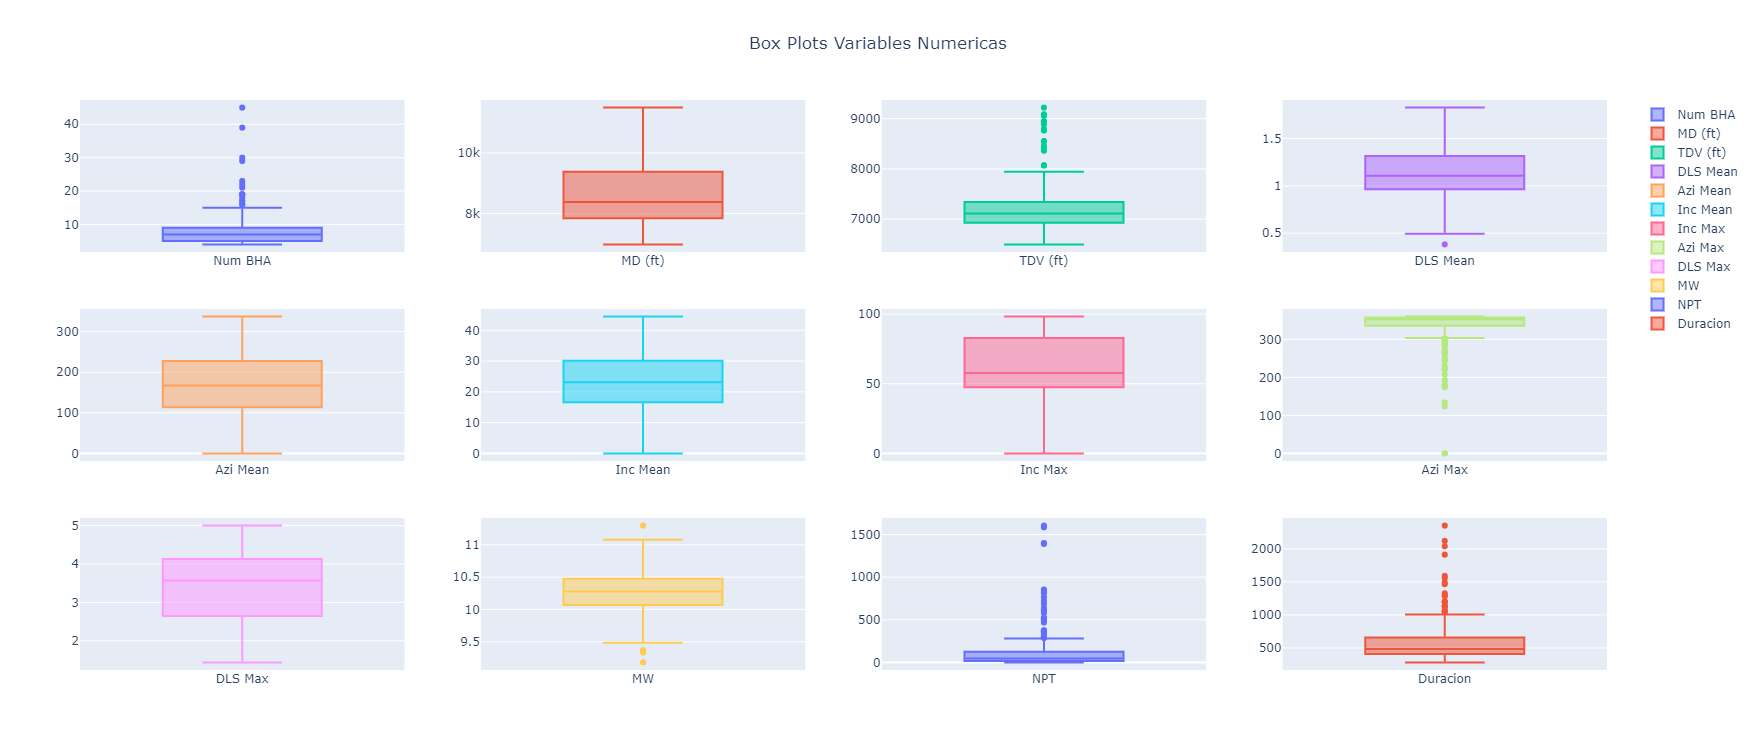

In [447]:
# Definimos los boxplots
trace1 = go.Box(y=Base["Num BHA"],name='Num BHA')
trace2 = go.Box(y=Base.MD,name='MD (ft)')
trace3 = go.Box(y=Base.TVD,name='TDV (ft)')
trace4 = go.Box(y=Base["DLS Mean"],name='DLS Mean')
trace5 = go.Box(y=Base["Azi Mean"],name='Azi Mean')
trace6 = go.Box(y=Base["Inc Mean"],name='Inc Mean')
trace7 = go.Box(y=Base["Inc Max"],name='Inc Max')
trace8 = go.Box(y=Base["Azi Max"],name='Azi Max')
trace9 = go.Box(y=Base["DLS Max"],name='DLS Max')
trace10 = go.Box(y=Base["MW"],name='MW')
trace11 = go.Box(y=Base["Tiempo"],name='NPT')
trace12 = go.Box(y=Base["Duracion"],name='Duracion')

# Definimos el grid
fig = make_subplots(rows=3, cols=4)

# Añadimos los boxplots
fig.append_trace(trace1, row = 1, col = 1)
fig.append_trace(trace2, row = 1, col = 2)
fig.append_trace(trace3, row = 1, col = 3)
fig.append_trace(trace4, row = 1, col = 4)
fig.append_trace(trace5, row = 2, col = 1)
fig.append_trace(trace6, row = 2, col = 2)
fig.append_trace(trace7, row = 2, col = 3)
fig.append_trace(trace8, row = 2, col = 4)
fig.append_trace(trace9, row = 3, col = 1)
fig.append_trace(trace10, row = 3, col = 2)
fig.append_trace(trace11, row = 3, col = 3)
fig.append_trace(trace12, row = 3, col = 4)

# Modificamos el tamaño
fig.update_layout(height=750, width=1500,title={
        'text': "Box Plots Variables Numericas",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

In [448]:
Base[Base.Tiempo>0.5*Base.Duracion]

Pozo  Num BHA       MD     TVD  DLS Mean    Azi Mean  \
69           CASTILLA 215        8   8052.0  7152.8  0.867617  268.446180   
84           CASTILLA 232       14   9140.0  6770.7  1.297663  103.386306   
100          CASTILLA 252       10   9554.0  7008.0  1.719851   54.615484   
108          CASTILLA 264        8   7800.0  7188.2  1.000235  217.655393   
113          CASTILLA 270       13  10671.0  7126.2  1.363911  108.753200   
118          CASTILLA 276       10   9752.0  6930.8  1.535015  193.122000   
143          CASTILLA 308        6  10014.0  7121.8  1.400937  268.932832   
155          CASTILLA 328       10   9748.0  7051.9  1.391672  240.722891   
164          CASTILLA 344       10   8800.0  7325.8  1.316816  336.990073   
168          CASTILLA 348        7   8231.0  7496.6  1.122888  256.302885   
172          CASTILLA 357       13   9286.0  6868.5  1.482671  197.987814   
174          CASTILLA 359       16   9753.0  6885.0  1.656996  192.375247   
192          CASTILLA 386       10   7857.0  7033.0  1.184588  189.625053   
195          CASTILLA 402       10   8664.0  7402.8  1.337438  204.229759   
196          CASTILLA 405       11   8038.0  6611.7  1.473739  146.398152   
207          CASTILLA 420        6   8085.0  7453.6  1.047641  264.647977   
216          CASTILLA 441        7   9438.0  6782.3  1.360888  230.221429   
219          CASTILLA 444        8   8697.0  6824.3  1.503016  144.655167   
243          CASTILLA 469        7   8757.0  6809.9  1.246974  105.909749   
296  CASTILLA DISPOSAL 20        8  10893.0  9086.4  1.102667  185.552764   

      Inc Mean  Inc Max  Azi Max  DLS Max         MW  Tiempo   Tipo Pozo  \
69   21.637865    48.00   354.26     2.92  10.327083   468.0      TIPO J   
84   25.843197    88.54   355.29     4.94   9.485890   817.0  HORIZONTAL   
100  43.297161    93.00   353.05     4.92   9.484388  1390.0  HORIZONTAL   
108  15.254045    57.64   358.44     3.44  11.296774   638.0      TIPO J   
113  43.358960    90.14   336.74     3.93   9.584083  1400.5      TIPO J   
118  36.338308    95.96   358.85     4.57   9.591500   822.0  HORIZONTAL   
143  30.461858    89.48   353.09     4.45  10.025490   769.0  HORIZONTAL   
155  33.051719    88.33   357.17     4.91   9.504587  1585.5  HORIZONTAL   
164  36.803956    56.50   359.77     4.15   9.788073   502.0      TIPO J   
168  16.847082    61.80   346.57     3.89   9.518966   514.5      TIPO J   
172  27.691809    91.30   357.32     4.79   9.602392   855.0  HORIZONTAL   
174  39.840722    94.59   359.43     4.98   9.623529   687.0  HORIZONTAL   
192  22.136105    54.79   356.82     3.30   9.342945   846.5      TIPO J   
195  20.012781    91.18   359.00     5.00   9.181364  1605.0  HORIZONTAL   
196  25.374565    78.58   302.68     4.36  10.750667   525.5  HORIZONTAL   
207  13.143526    58.18   356.61     4.29   9.533628   509.0  HORIZONTAL   
216  31.494082    90.09   354.21     4.97   9.978073   622.0  HORIZONTAL   
219  32.859167    86.10   357.80     3.99   9.760000   516.5  HORIZONTAL   
243  26.938280    83.82   358.57     4.25  10.188169   610.0  HORIZONTAL   
296  23.492524    80.29   352.98     4.94   9.784224   606.0  HORIZONTAL   

        Duracion  
69    807.500000  
84   1293.500000  
100  1912.000000  
108  1008.000000  
113  2352.000000  
118  1590.000000  
143  1200.000000  
155  2120.000000  
164   849.983333  
168   967.000000  
172  1491.000000  
174  1283.500000  
192  1327.000000  
195  2040.000000  
196   864.000000  
207   858.000000  
216  1046.000000  
219   872.000000  
243  1138.500000  
296  1201.000000

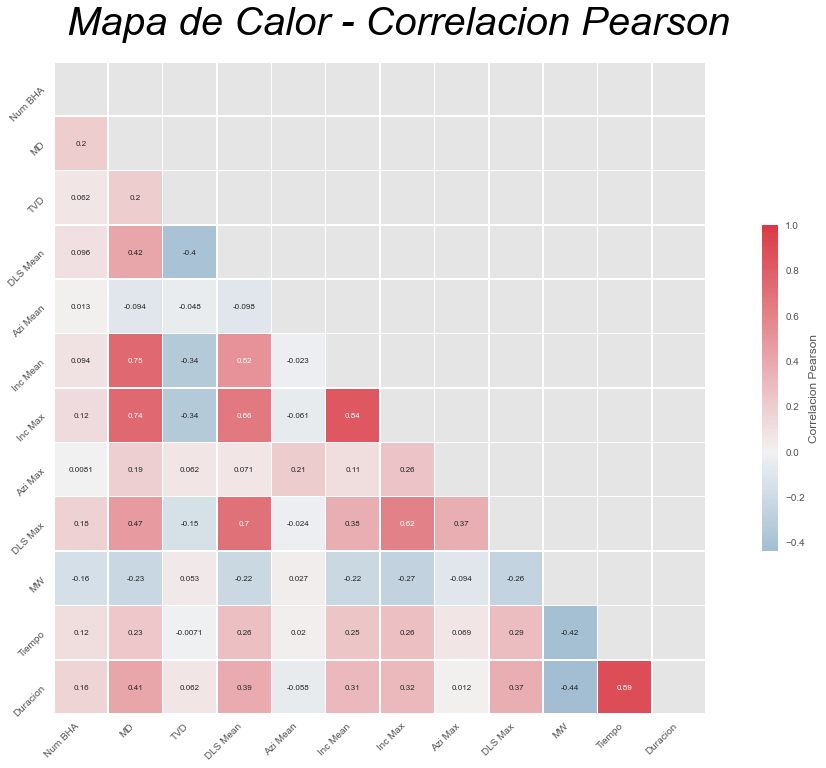

In [449]:
corr = Base.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20,12))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
g=sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=0.5,annot=True,
            cbar_kws={"shrink": 0.5, "label":"Correlacion Pearson"},
            annot_kws={'size':8})
plt.text(0.25,-0.5, "Mapa de Calor - Correlacion Pearson", fontsize = 40, color='Black', fontstyle='italic')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), rotation=45, horizontalalignment='right');

In [450]:
#import regression module 
from pycaret.regression import * 

#intialize the setup (in Notebook env)
exp_reg = setup(Base, target = 'Tiempo',
                ignore_features=["DLS Max","Inc Mean","Pozo"],
                ignore_low_variance=True,
                feature_selection=True,
                session_id=123,
                silent = True
                )

In [534]:
# compare all baseline models and select top 5
top5 = compare_models(n_select = 5,exclude = ["lar"],sort = 'RMSE') 

In [641]:
!pip install scikit-optimize

In [664]:
# tune top 5 base models
tuned_top5 = [tune_model(i,optimize="RMSE",search_library="optuna",search_algorithm="tpe",early_stopping="Hyperband") for i in top5]

In [671]:
# ensemble top 5 tuned models
bagged_top5 = [ensemble_model(i,optimize="RMSE") for i in tuned_top5]

In [672]:
# blend top 5 base models 
blender = blend_models(estimator_list = top5,optimize="RMSE") 

In [581]:
# select best model 
best = automl(optimize = 'RMSE')

In [567]:
best_model_results = pull()
best_model_results

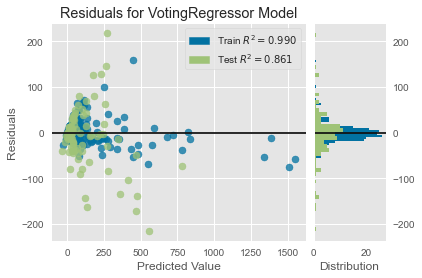

In [678]:
plot_model(blender)

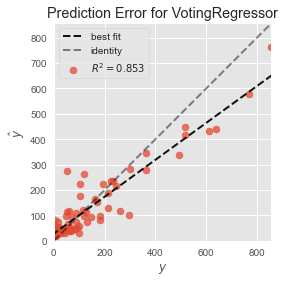

In [583]:
plot_model(blender,plot="error")

In [584]:
predict_model(blender)

Tipo Pozo_TIPO J  Tipo Pozo_VERTICAL    Azi Mean  Tipo Pozo_HORIZONTAL  \
0                1.0                 0.0  249.998917                   0.0   
1                1.0                 0.0  190.048813                   0.0   
2                1.0                 0.0  236.975571                   0.0   
3                1.0                 0.0  144.310516                   0.0   
4                1.0                 0.0  112.814835                   0.0   
..               ...                 ...         ...                   ...   
87               1.0                 0.0  123.541313                   0.0   
88               1.0                 0.0  151.309769                   0.0   
89               1.0                 0.0   73.369888                   0.0   
90               1.0                 0.0  130.436096                   0.0   
91               0.0                 0.0  197.987808                   1.0   

    Num BHA     Azi Max         MW  Duracion       MD  Tipo Pozo_TIPO S  \
0      12.0  354.500000  10.484000     576.0   7611.0               0.0   
1      16.0  352.989990  10.053098     843.5  11500.0               0.0   
2       6.0  355.429993  10.081482     417.5   7385.0               0.0   
3       7.0  330.269989  10.124561     398.0   7900.0               0.0   
4       6.0  357.760010  10.165217     528.0   9858.0               0.0   
..      ...         ...        ...       ...      ...               ...   
87      4.0  359.929993  10.194118     384.0   8051.0               0.0   
88      5.0  223.100006  10.240351     424.0   8113.0               0.0   
89      5.0  353.579987  10.192307     526.5   7948.0               0.0   
90      7.0  359.369995  10.933898     455.0   8608.0               0.0   
91     13.0  357.320007   9.602392    1491.0   9286.0               0.0   

            TVD  DLS Mean    Inc Max  Tiempo       Label  
0   7157.799805  1.009456  46.000000    88.5  110.787766  
1   8938.099609  1.072503  78.779999   225.5  235.671299  
2   7097.000000  0.909974  43.520000    90.0   50.730235  
3   7343.700195  0.821762  42.840000    21.0   53.517273  
4   6820.000000  1.528507  92.099998    38.0   44.170051  
..          ...       ...        ...     ...         ...  
87  7704.899902  1.041631  46.049999     7.0   33.432001  
88  7236.200195  0.975678  52.220001    83.0   48.178579  
89  7433.799805  0.886988  37.099998    58.0  116.577765  
90  7354.100098  1.017179  71.000000     5.0   44.525431  
91  6868.500000  1.482671  91.300003   855.0  760.972153  

[92 rows x 15 columns]

In [585]:
blender

VotingRegressor(estimators=[('xgboost',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=-1,
                                          n...
                             ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                                 criteri

In [544]:
final_NPT = finalize_model(blender)
save_model(final_NPT, 'Model_NPT')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False,
                                       features_todrop=['DLS Max', 'Inc Mean',
                                                        'Pozo'],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Tiempo',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numeri...
                                                                   max_samples=None,
                                                                   min_impurity_decrease=0.0,
                                                                   mi

In [545]:
from pycaret.regression import load_model
saved_lr = load_model('Model_NPT')

Transformation Pipeline and Model Successfully Loaded


In [612]:
plot_model(blender, plot = 'parameter')

Parameters
estimators  [('gbr', GradientBoostingRegressor(alpha=0.9, ...
n_jobs                                                     -1
verbose                                                 False
weights                                                  None

In [616]:
blender.estimators

[('gbr',
  GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                            init=None, learning_rate=0.1, loss='ls', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=123, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0, warm_start=False)),
 ('xgboost',
  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
        

In [491]:
lr = create_model('lr')

In [492]:
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [617]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 80, 150)
    max_depth = trial.suggest_int('max_depth', 1, 15)
    alpha=trial.suggest_uniform("alpha", 0.01, 50)
    learning_rate=trial.suggest_uniform("learning_rate", 0.01, 20)
    
    gbr = create_model('gbr', max_depth = max_depth, n_estimators = n_estimators,verbose = False)
    xgboost = create_model('xgboost', max_depth = max_depth, n_estimators = n_estimators,verbose = False)
    rf = create_model('rf', max_depth = max_depth, n_estimators = n_estimators,verbose = False)
    et = create_model('et', max_depth = max_depth, n_estimators = n_estimators,verbose = False)
    lr = create_model('lr',copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False,verbose = False)
    
    estimator_list = [gbr,xgboost,rf,et,lr]

    
    blender = blend_models(estimator_list = estimator_list,optimize="RMSE",verbose = False) 
    
    return sklearn.model_selection.cross_val_score(blender, get_config("X"), get_config("y"), n_jobs=-1, cv=3).mean()
    
study = optuna.create_study(sampler=optuna.samplers.TPESampler(),direction='maximize',pruner=optuna.pruners.HyperbandPruner())
study.optimize(objective, n_trials=100) 

trial = study.best_trial
print('Accuracy: {}'.format(trial.value))

Accuracy: 0.765194863698265


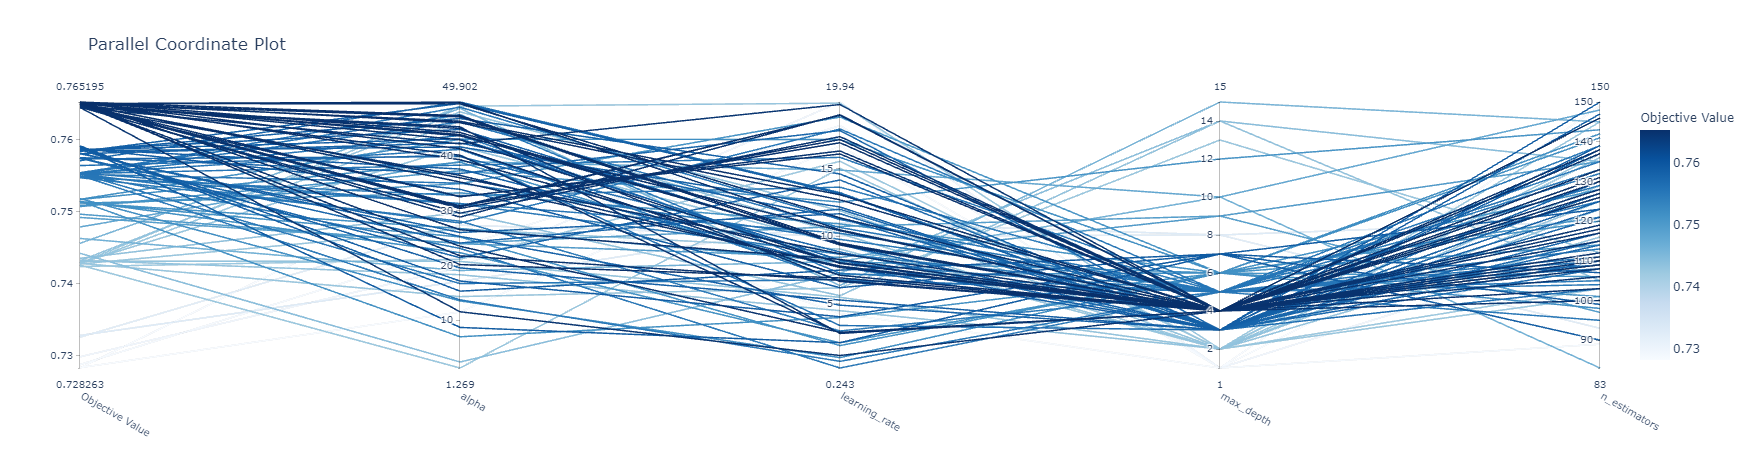

In [618]:
optuna.visualization.plot_parallel_coordinate(study)

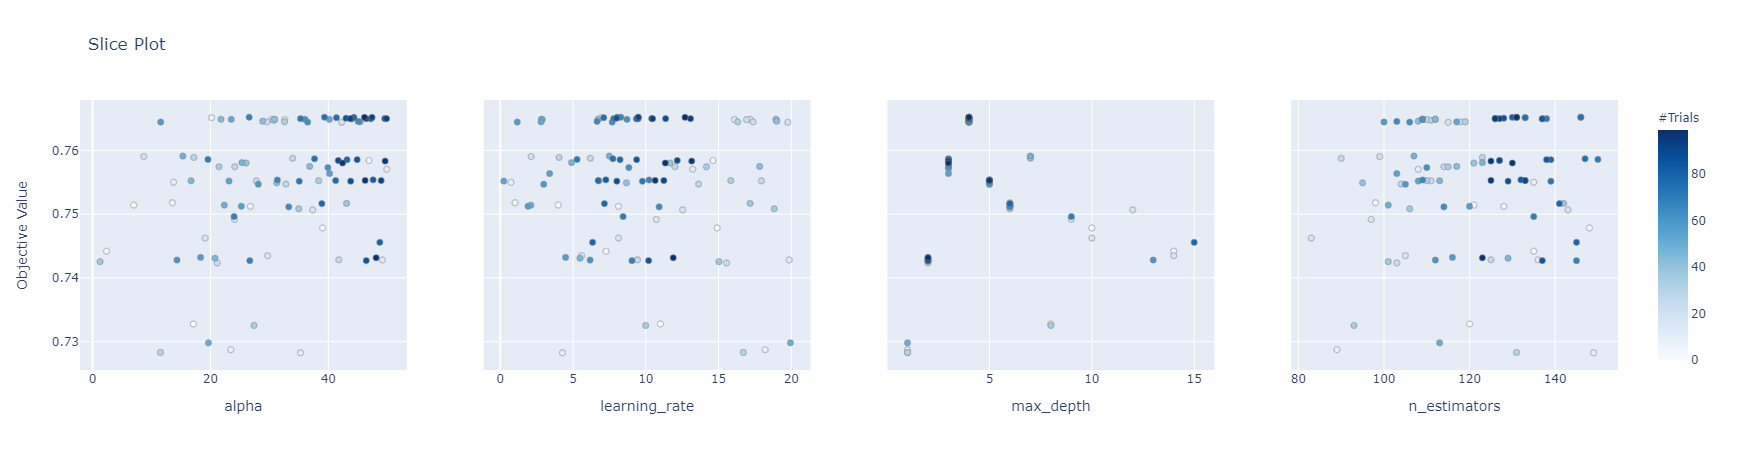

In [619]:
optuna.visualization.plot_slice(study)

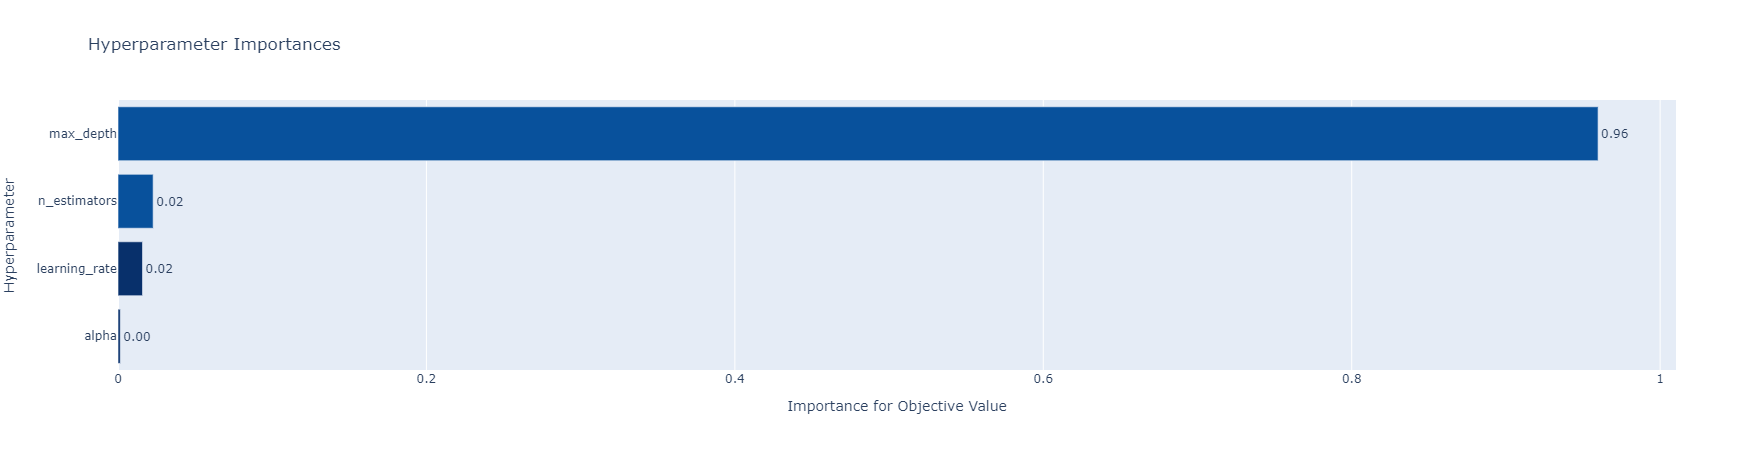

In [620]:
optuna.visualization.plot_param_importances(study)

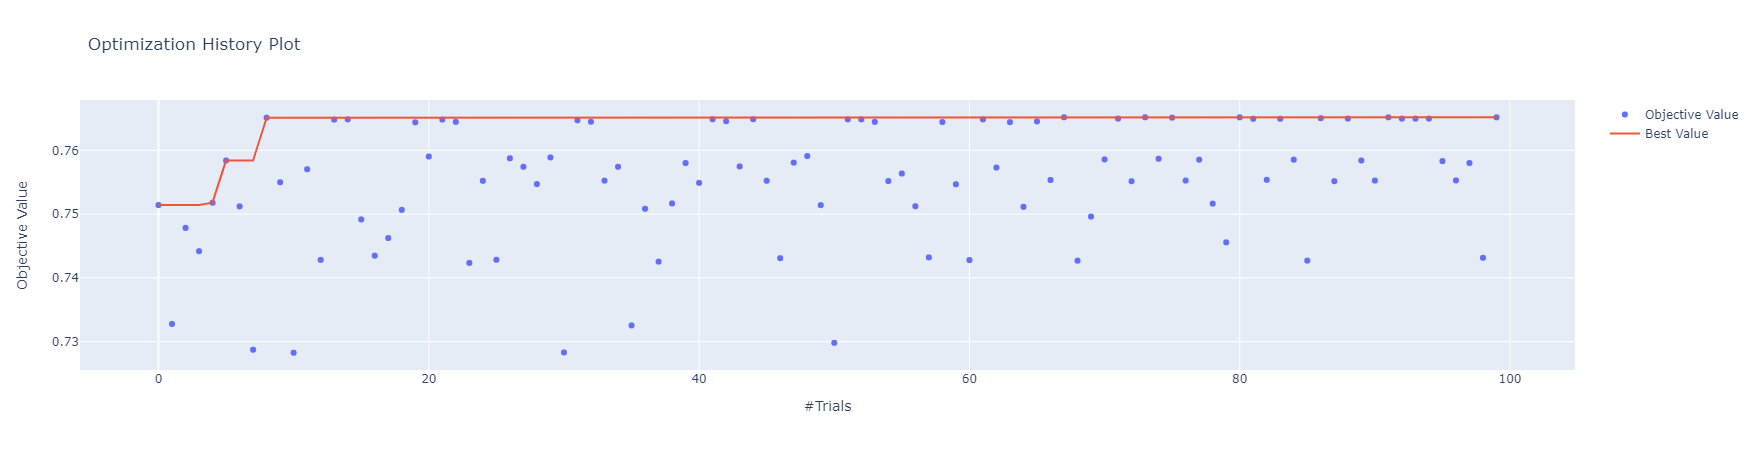

In [621]:
optuna.visualization.plot_optimization_history(study)

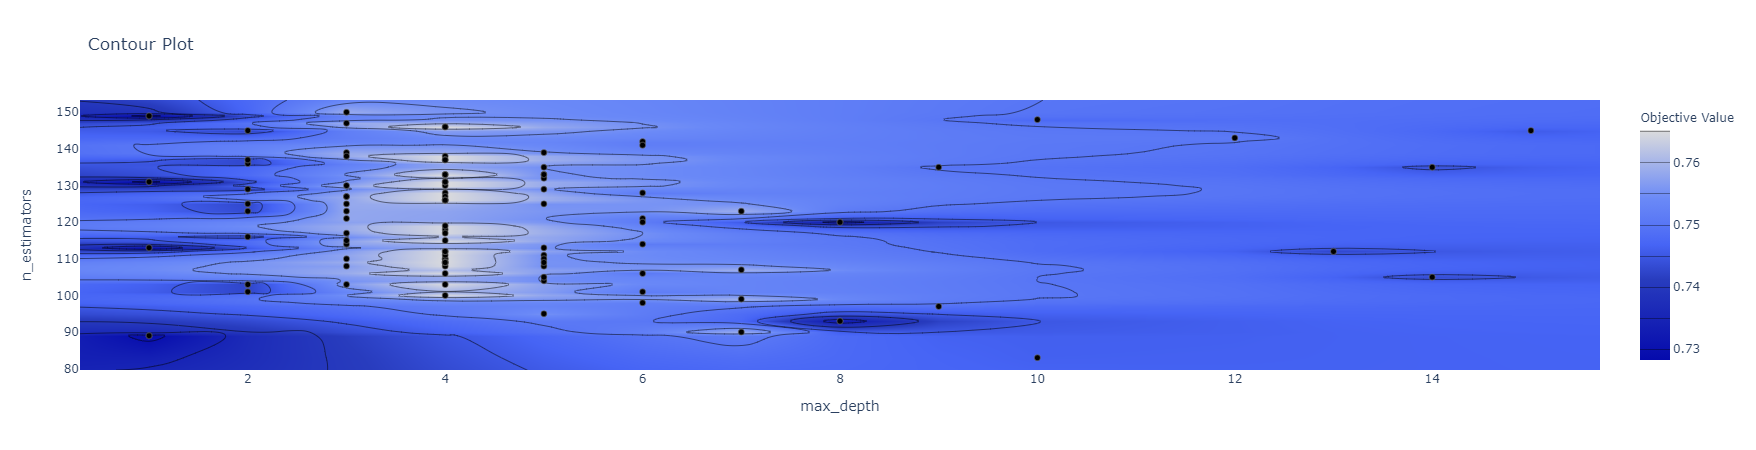

In [622]:
optuna.visualization.plot_contour(study, params=["max_depth", "n_estimators"])

In [623]:
print("Best hyperparameters: {}".format(trial.params))

Best hyperparameters: {'n_estimators': 146, 'max_depth': 4, 'alpha': 26.55693272330601, 'learning_rate': 8.284431265879276}
